## 🌟 Project Overview
A collection of my solutions to [Project Euler](https://projecteuler.net) problems, focused on:
- Mathematical problem-solving
- Algorithm optimization
- Cross-language implementations (Python, Julia, etc.)

# Project Euler Problem 1: Multiples of 3 or 5

**Problem Statement:**  

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6, and 9. The sum of these multiples is 23.  

**Find the sum of all multiples of 3 or 5 below 1000.**

## 📊 Brute Force Approach

### Initial Thoughts:
- Iterate through all numbers below 1000
- Check if divisible by 3 or 5
- Sum the qualifying numbers

In [2]:
def brute_force(limit=1000):
    total = 0
    for num in range(limit):
        if num % 3 == 0 or num % 5 == 0:
            total += num
    return total

print(brute_force())

233168


## Mathematical Solution to Project Euler Problem 1

## Problem Statement
Find the sum of all natural numbers below 1000 that are multiples of 3 or 5.

## 1. Understanding the Problem
We need to compute:
$$
S = \sum_{\substack{n=1 \\ 3 \mid n \text{ or } 5 \mid n}}^{999} n
$$

## 2. Brute Force Summation
The simplest approach is linear summation:

$$
S = \sum_{n=1}^{999} n \cdot \mathbb{I}(3 \mid n \lor 5 \mid n)
$$

Where $\mathbb{I}$ is the indicator function (1 if true, 0 otherwise).

**Computational Complexity:** $O(n)$

## 3. Mathematical Optimization

### 3.1 Sum of Multiples
For any positive integer $k$, the sum of multiples of $k$ below 1000 is:

$$
S_k = \sum_{m=1}^{p} km = k \sum_{m=1}^{p} m = k \cdot \frac{p(p+1)}{2}
$$

Where $p = \left\lfloor \frac{999}{k} \right\rfloor$

### 3.2 Inclusion-Exclusion Principle
The total sum $S$ of multiples of 3 or 5 equals:

$$
S = S_3 + S_5 - S_{15}
$$

This accounts for double-counting numbers divisible by both 3 and 5 (i.e., multiples of 15).

### 3.3 Calculation Steps

#### a) Multiples of 3
- Largest multiple: $3 \times 333 = 999$
- Number of terms: $p_3 = 333$
- Sum:
  $$
  S_3 = 3 \times \frac{333 \times 334}{2} = 166833
  $$

#### b) Multiples of 5
- Largest multiple: $5 \times 199 = 995$
- Number of terms: $p_5 = 199$
- Sum:
  $$
  S_5 = 5 \times \frac{199 \times 200}{2} = 99500
  $$

#### c) Multiples of 15 (Correction Term)
- Largest multiple: $15 \times 66 = 990$
- Number of terms: $p_{15} = 66$
- Sum:
  $$
  S_{15} = 15 \times \frac{66 \times 67}{2} = 33165
  $$

### 3.4 Final Computation
$$
S = S_3 + S_5 - S_{15} = 166833 + 99500 - 33165 = 233168
$$

## 4. General Solution Formula
For an arbitrary limit $L$:

$$
S(L) = \left(3 \cdot \frac{p_3(p_3+1)}{2}\right) + \left(5 \cdot \frac{p_5(p_5+1)}{2}\right) - \left(15 \cdot \frac{p_{15}(p_{15}+1)}{2}\right)
$$

Where:
$$
p_k = \left\lfloor \frac{L-1}{k} \right\rfloor
$$

## 5. Mathematical Insights
1. **Arithmetic Series:** The solution leverages the formula for the sum of the first $n$ natural numbers:
   $$
   \sum_{i=1}^n i = \frac{n(n+1)}{2}
   $$

2. **Divisibility:** The floor function efficiently counts multiples:
   $$
   \text{Multiples of } k \text{ below } L = \left\lfloor \frac{L-1}{k} \right\rfloor
   $$

3. **Set Theory:** The inclusion-exclusion principle ensures correct counting:
   $$
   |A \cup B| = |A| + |B| - |A \cap B|
   $$

## 6. Computational Complexity
- **Brute Force:** $O(n)$
- **Mathematical Method:** $O(1)$ (constant time, as it uses closed-form formulas)

## 7. Verification
For $L = 10$:
- $S_3 = 3 + 6 + 9 = 18$
- $S_5 = 5$
- $S_{15} = 0$
- $S = 18 + 5 - 0 = 23$ ✓ (matches given example)

In [7]:
def mathematical(limit=1000):
    def sum_multiples(k, limit):
        p = (limit - 1) // k
        return k * p * (p + 1) // 2
    return sum_multiples(3, limit) + sum_multiples(5, limit) - sum_multiples(15, limit)

result = mathematical(limit=1000)
print(result) 

233168


## Benchmark

We can now proceed to create a small benchmark between the two previous solutions:

Running benchmarks with tqdm...


Benchmarking mathematical: 100%|██████████| 5/5 [00:00<00:00, 656.51size/s]



Results:
      Size   Brute (μs)    Math (μs)    Speedup
--------------------------------------------------
        10         0.59         0.34        1.7x
       100         5.95         0.30       19.8x
     1,000        57.00         0.33      171.2x
   100,000      4458.32         0.38    11888.8x
10,000,000    448854.00         0.42  1056127.7x


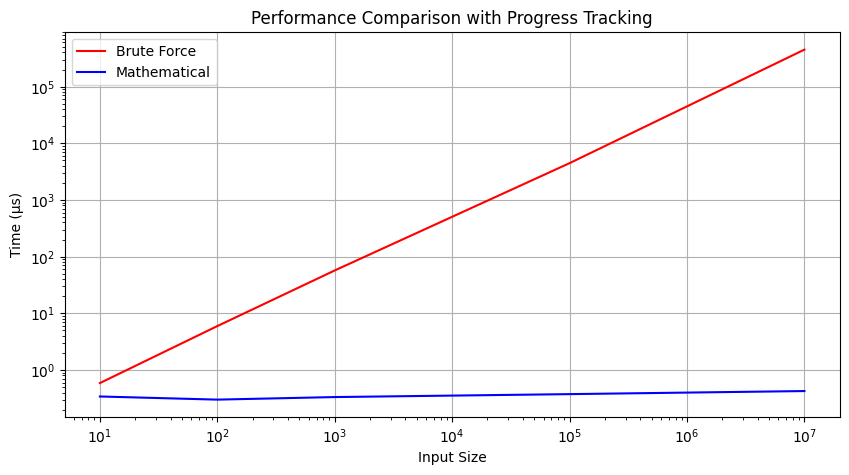

In [12]:
# Benchmarking with tqdm progress bars
from tqdm import tqdm
import timeit
import matplotlib.pyplot as plt
import numpy as np


def benchmark_with_progress(func, sizes, repeats=1000):
    """Benchmark with tqdm progress bars"""
    times = []
    for n in tqdm(sizes, desc=f'Benchmarking {func.__name__}', unit='size'):
        stmt = f'{func.__name__}({n})'
        setup = f'from __main__ import {func.__name__}'
        timer = timeit.Timer(stmt, setup=setup)
        # Minimum time with progress
        with tqdm(total=3, leave=False, desc=f'n={n}', unit='repeat') as pbar:
            times.append(min([timer.timeit(number=repeats) for _ in range(3)]) / repeats * 1e6)
            pbar.update(3)
    return times

# ---- Parameters ----
input_sizes = [10, 100, 1000, 10**5, 10**7]
repeats = 100

# ---- Run with Progress ----
print("Running benchmarks with tqdm...")
bf_times = benchmark_with_progress(brute_force, input_sizes, repeats)
math_times = benchmark_with_progress(mathematical, input_sizes, repeats)

# ---- Results ----
print("\nResults:")
print(f"{'Size':>10} {'Brute (μs)':>12} {'Math (μs)':>12} {'Speedup':>10}")
print("-" * 50)
for n, bf, math in zip(input_sizes, bf_times, math_times):
    print(f"{n:>10,} {bf:>12.2f} {math:>12.2f} {bf/math:>10.1f}x")

# ---- Visualization ----
plt.figure(figsize=(10, 5))
plt.plot(input_sizes, bf_times, 'r-', label='Brute Force')
plt.plot(input_sizes, math_times, 'b-', label='Mathematical')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size')
plt.ylabel('Time (μs)')
plt.title('Performance Comparison with Progress Tracking')
plt.legend()
plt.grid(True)
plt.show()